In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

device_types = ["rpi4_4", "rpi4_8", "rpi5_4", "rpi5_8", "msl5_16", "colab"]
replica_sizes = ["64", "128", "256", "512", "1024"]
n_signatures = [str(i) for i in range(1, 101)]

### 1. Data hashing

{'rpi4_4': {'64': {'min': 0.3892996311187744, 'max': 0.3903830051422119, 'avg': 0.38984754323959353}, '128': {'min': 0.7790839672088623, 'max': 0.7802608013153076, 'avg': 0.7796354961395263}, '256': {'min': 1.5583140850067139, 'max': 1.560236930847168, 'avg': 1.5592421364784241}, '512': {'min': 3.116896390914917, 'max': 3.1199522018432617, 'avg': 3.1183360505104063}, '1024': {'min': 6.234684944152832, 'max': 6.239014148712158, 'avg': 6.236428396701813}}, 'rpi4_8': {'64': {'min': 0.3896458148956299, 'max': 0.39058470726013184, 'avg': 0.3900881624221802}, '128': {'min': 0.779393196105957, 'max': 0.78067946434021, 'avg': 0.7800915050506592}, '256': {'min': 1.558917760848999, 'max': 1.560807704925537, 'avg': 1.5599935460090637}, '512': {'min': 3.1183156967163086, 'max': 3.120870351791382, 'avg': 3.119559235572815}, '1024': {'min': 6.237351894378662, 'max': 6.2414939403533936, 'avg': 6.239345428943634}}, 'rpi5_4': {'64': {'min': 0.043720245361328125, 'max': 0.04380011558532715, 'avg': 0.043

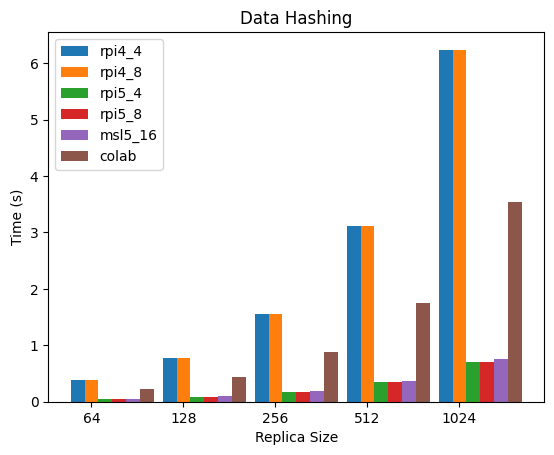

In [4]:
data1 = {}
for device_type in device_types:
    data1[device_type] = {}
    for replica_size in replica_sizes:
        data1[device_type][replica_size] = {}
        with open(f"data/1_data_hashing_times_{device_type}.json", "r") as f:
            times = json.load(f)
            data1[device_type][replica_size]["min"] = min(times[replica_size])
            data1[device_type][replica_size]["max"] = max(times[replica_size])
            data1[device_type][replica_size]["avg"] = sum(times[replica_size]) / len(times[replica_size])

print(data1)
fig, ax = plt.subplots()
ax.set_title("Data Hashing")
ax.set_xlabel("Replica Size")
ax.set_ylabel("Time (s)")
x = np.arange(len(replica_sizes))
width = 0.15
multiplier = 0
for device_type in device_types:
    offset = width * multiplier
    avg_times = [data1[device_type][replica_size]["avg"] for replica_size in replica_sizes]
    rects = ax.bar(x + offset, avg_times, width, label=device_type)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
ax.set_xticks(x + width, replica_sizes)
ax.legend()
plt.show()

### 2. Signature generation

{'rpi4_4': {'min': 0.0027093887329101562, 'max': 0.002763509750366211, 'avg': 0.0027150654792785643}, 'rpi4_8': {'min': 0.0027081966400146484, 'max': 0.002753019332885742, 'avg': 0.0027135396003723144}, 'rpi5_4': {'min': 0.0019011497497558594, 'max': 0.00307464599609375, 'avg': 0.002155132293701172}, 'rpi5_8': {'min': 0.001901388168334961, 'max': 0.0030825138092041016, 'avg': 0.0021173620223999025}, 'msl5_16': {'min': 0.0, 'max': 0.001644134521484375, 'avg': 0.0004941534996032715}, 'colab': {'min': 0.0005185604095458984, 'max': 0.0009801387786865234, 'avg': 0.0005618929862976074}}


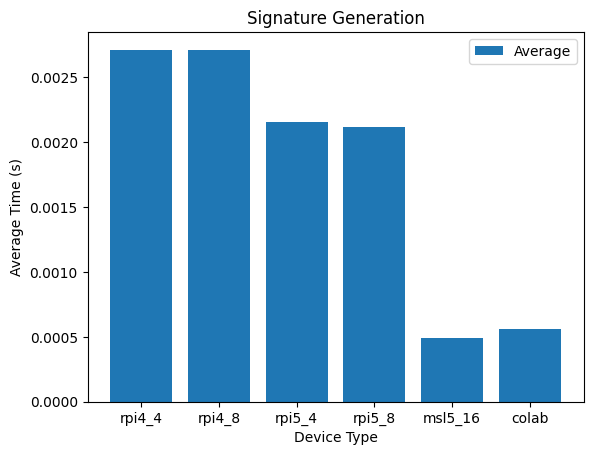

In [5]:
data2 = {}
for device_type in device_types:
    data2[device_type] = {}
    with open(f"data/2_signature_generation_times_{device_type}.json", "r") as f:
        times = json.load(f)
    data2[device_type]["min"] = min(times)
    data2[device_type]["max"] = max(times)
    data2[device_type]["avg"] = sum(times) / len(times)
 
print(data2)
fig, ax = plt.subplots()
ax.set_title("Signature Generation")
ax.set_xlabel("Device Type")
ax.set_ylabel("Average Time (s)")
x = np.arange(len(device_types))
# width = 0.18
avg_times = [data2[device_type]["avg"] for device_type in device_types]
# yerr = [data2[device_type]["avg"] - data2[device_type]["min"] for device_type in device_types]
# add different colour for each bar
rects = ax.bar(x, avg_times, label="Average")
# ax.bar_label(rects, padding=3)
ax.set_xticks(x, device_types)
ax.legend()
plt.show()

### 3. Signature aggregation

{'rpi4_4': {'1': {'min': 1.7642974853515625e-05, 'max': 2.8371810913085938e-05, 'avg': 1.8160343170166016e-05}, '2': {'min': 3.170967102050781e-05, 'max': 3.314018249511719e-05, 'avg': 3.188133239746094e-05}, '3': {'min': 4.553794860839844e-05, 'max': 5.269050598144531e-05, 'avg': 4.607439041137695e-05}, '4': {'min': 5.984306335449219e-05, 'max': 6.67572021484375e-05, 'avg': 6.017923355102539e-05}, '5': {'min': 7.390975952148438e-05, 'max': 8.678436279296875e-05, 'avg': 7.455348968505859e-05}, '6': {'min': 8.7738037109375e-05, 'max': 9.489059448242188e-05, 'avg': 8.828163146972656e-05}, '7': {'min': 0.00010156631469726562, 'max': 0.00010824203491210938, 'avg': 0.00010230302810668945}, '8': {'min': 0.00011563301086425781, 'max': 0.00012493133544921875, 'avg': 0.00011633634567260742}, '9': {'min': 0.00012946128845214844, 'max': 0.00013875961303710938, 'avg': 0.00013022661209106446}, '10': {'min': 0.00014352798461914062, 'max': 0.00015044212341308594, 'avg': 0.0001440739631652832}, '11': 

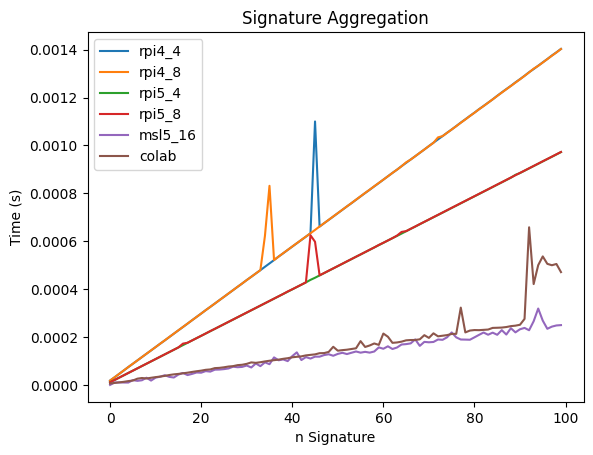

In [6]:
data3 = {}
for device_type in device_types:
    data3[device_type] = {}
    for n in n_signatures:
        data3[device_type][n] = {}
        with open(f"data/3_signature_aggregation_times_{device_type}.json", "r") as f:
            times = json.load(f)
            data3[device_type][n]["min"] = min(times[n])
            data3[device_type][n]["max"] = max(times[n])
            data3[device_type][n]["avg"] = sum(times[n]) / len(times[n])
 
print(data3)
fig, ax = plt.subplots()
ax.set_title("Signature Aggregation")
ax.set_xlabel("n Signature")
ax.set_ylabel("Time (s)")
x = np.arange(100)
for device_type in device_types:
    avg_times = [data3[device_type][n]["avg"] for n in n_signatures]
    ax.plot(x, avg_times, label=device_type)
ax.legend()
plt.show()

### 4. Signature verification

{'rpi4_4': {'1': {'min': 0.007966279983520508, 'max': 0.008014917373657227, 'avg': 0.007972371578216553}, '2': {'min': 0.00799870491027832, 'max': 0.008075237274169922, 'avg': 0.008001775741577148}, '3': {'min': 0.008004903793334961, 'max': 0.008092641830444336, 'avg': 0.008007619380950928}, '4': {'min': 0.008009910583496094, 'max': 0.008061647415161133, 'avg': 0.008012573719024658}, '5': {'min': 0.008015632629394531, 'max': 0.008046627044677734, 'avg': 0.008017008304595947}, '6': {'min': 0.008021116256713867, 'max': 0.008047103881835938, 'avg': 0.008022541999816895}, '7': {'min': 0.008026361465454102, 'max': 0.00805521011352539, 'avg': 0.00802809715270996}, '8': {'min': 0.00803232192993164, 'max': 0.010198831558227539, 'avg': 0.008062093257904053}, '9': {'min': 0.008038043975830078, 'max': 0.00837087631225586, 'avg': 0.008043241500854493}, '10': {'min': 0.008043289184570312, 'max': 0.008074045181274414, 'avg': 0.008045053482055664}, '11': {'min': 0.008048772811889648, 'max': 0.0082850

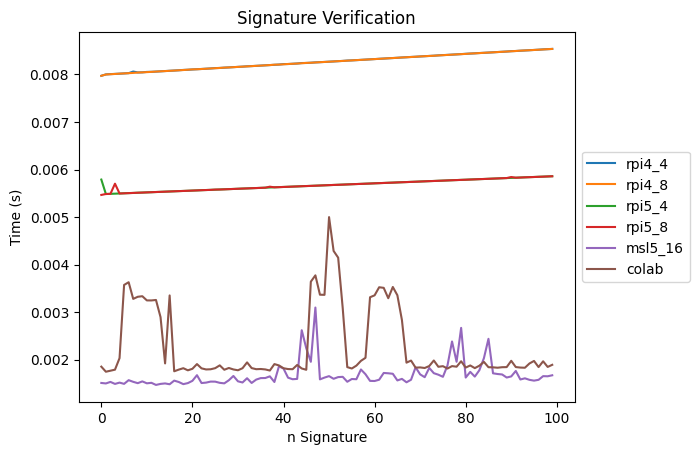

In [7]:
data4 = {}
for device_type in device_types:
    data4[device_type] = {}
    for n in n_signatures:
        data4[device_type][n] = {}
        with open(f"data/4_signature_verification_times_{device_type}.json", "r") as f:
            times = json.load(f)
            data4[device_type][n]["min"] = min(times[n])
            data4[device_type][n]["max"] = max(times[n])
            data4[device_type][n]["avg"] = sum(times[n]) / len(times[n])

print(data4)
fig, ax = plt.subplots()
ax.set_title("Signature Verification")
ax.set_xlabel("n Signature")
ax.set_ylabel("Time (s)")
x = np.arange(100)
for device_type in device_types:
    avg_times = [data4[device_type][n]["avg"] for n in n_signatures]
    ax.plot(x, avg_times, label=device_type)
# show legend outside of plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Time consumption in different phases

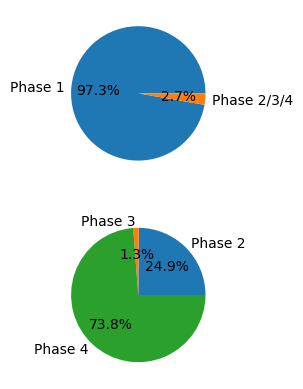

In [12]:
device_type = "rpi4_8"

# plot pie chart
fig, axs = plt.subplots(2, 1)
axs[0].pie([data1[device_type]["64"]["avg"], data2[device_type]["avg"]+data3[device_type]["10"]["avg"]+data4[device_type]["10"]["avg"]], labels=["Phase 1", "Phase 2/3/4"], autopct='%1.1f%%')
axs[1].pie([data2[device_type]["avg"], data3[device_type]["10"]["avg"], data4[device_type]["10"]["avg"]], labels=["Phase 2", "Phase 3", "Phase 4"], autopct='%1.1f%%')
plt.show()